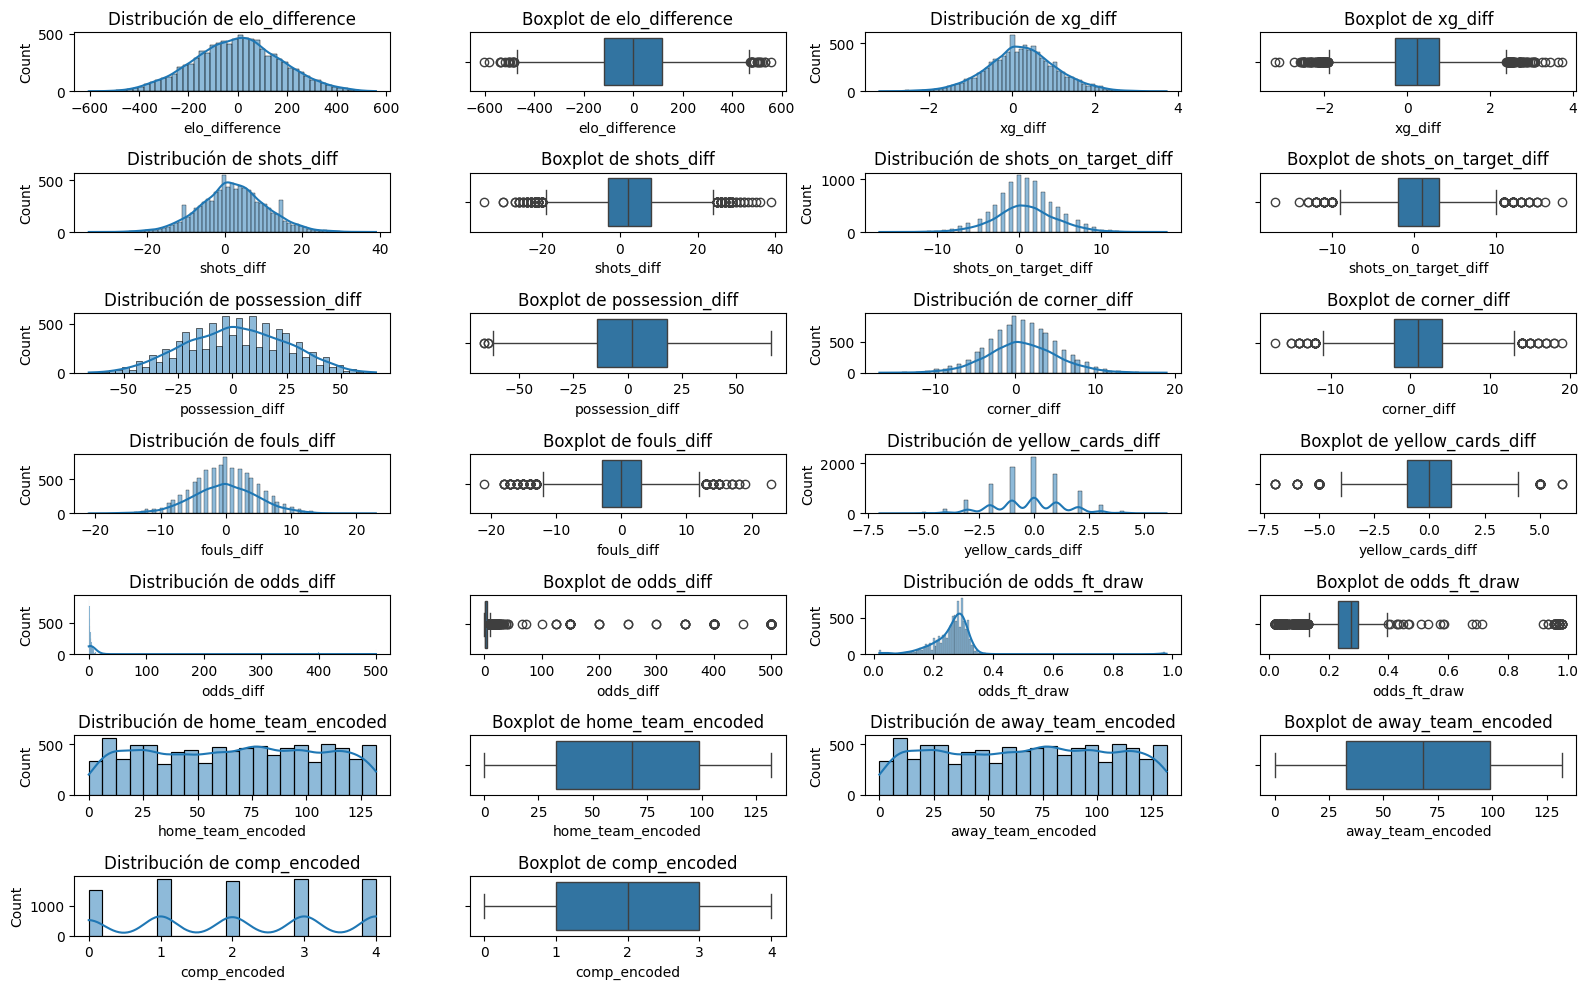

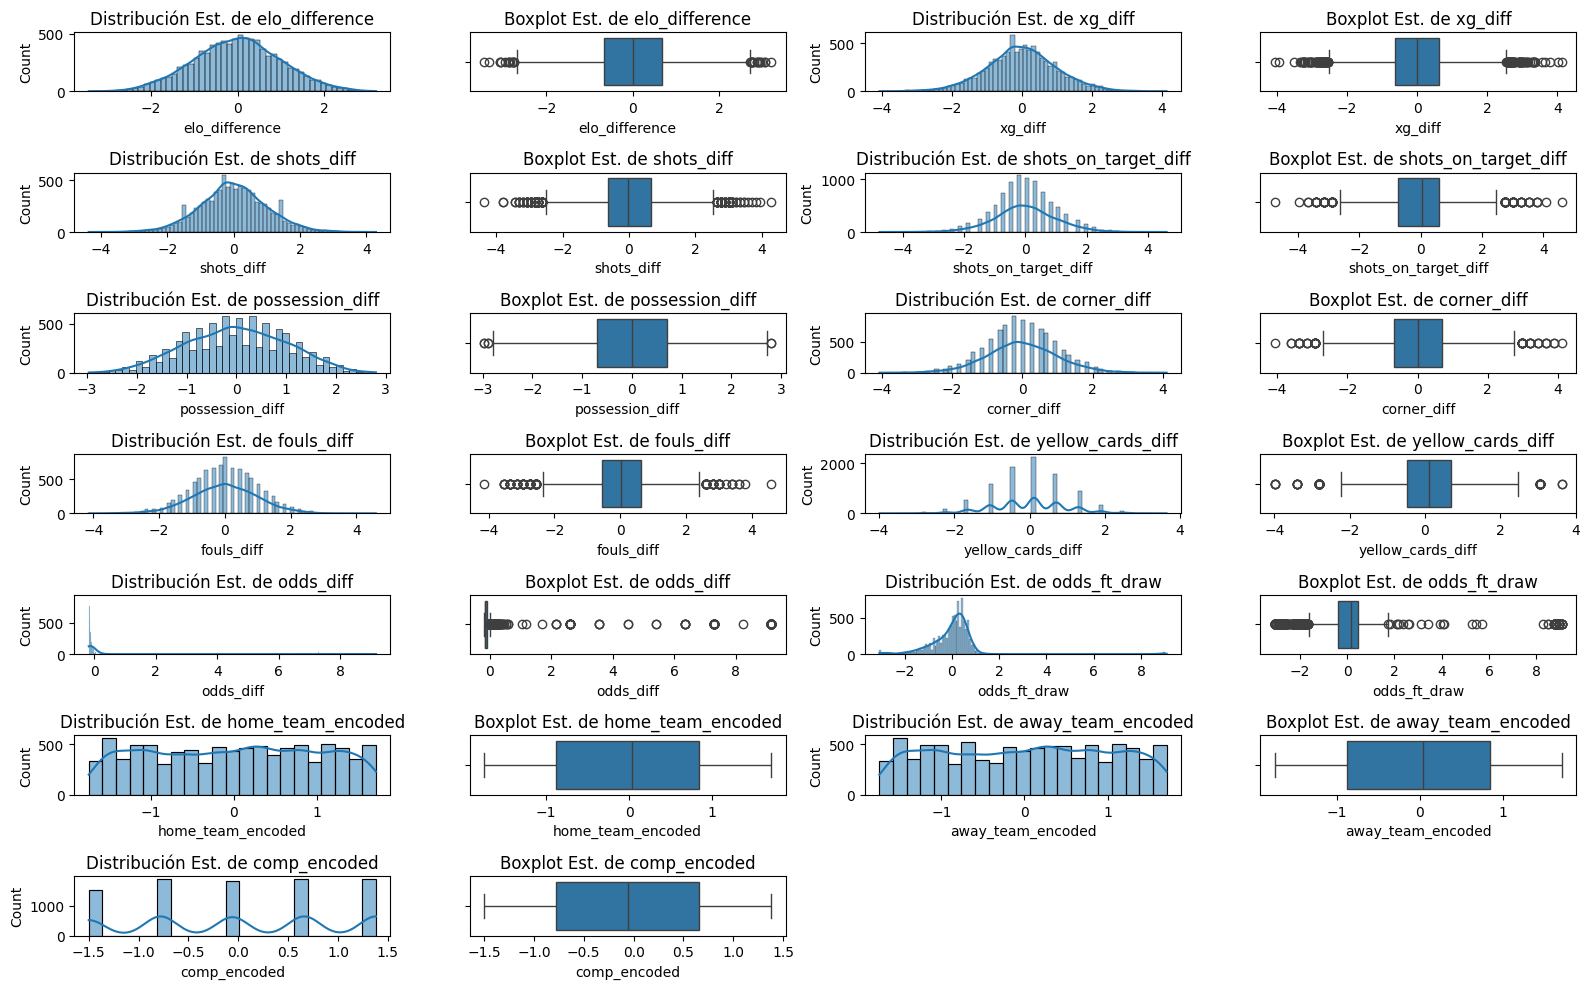

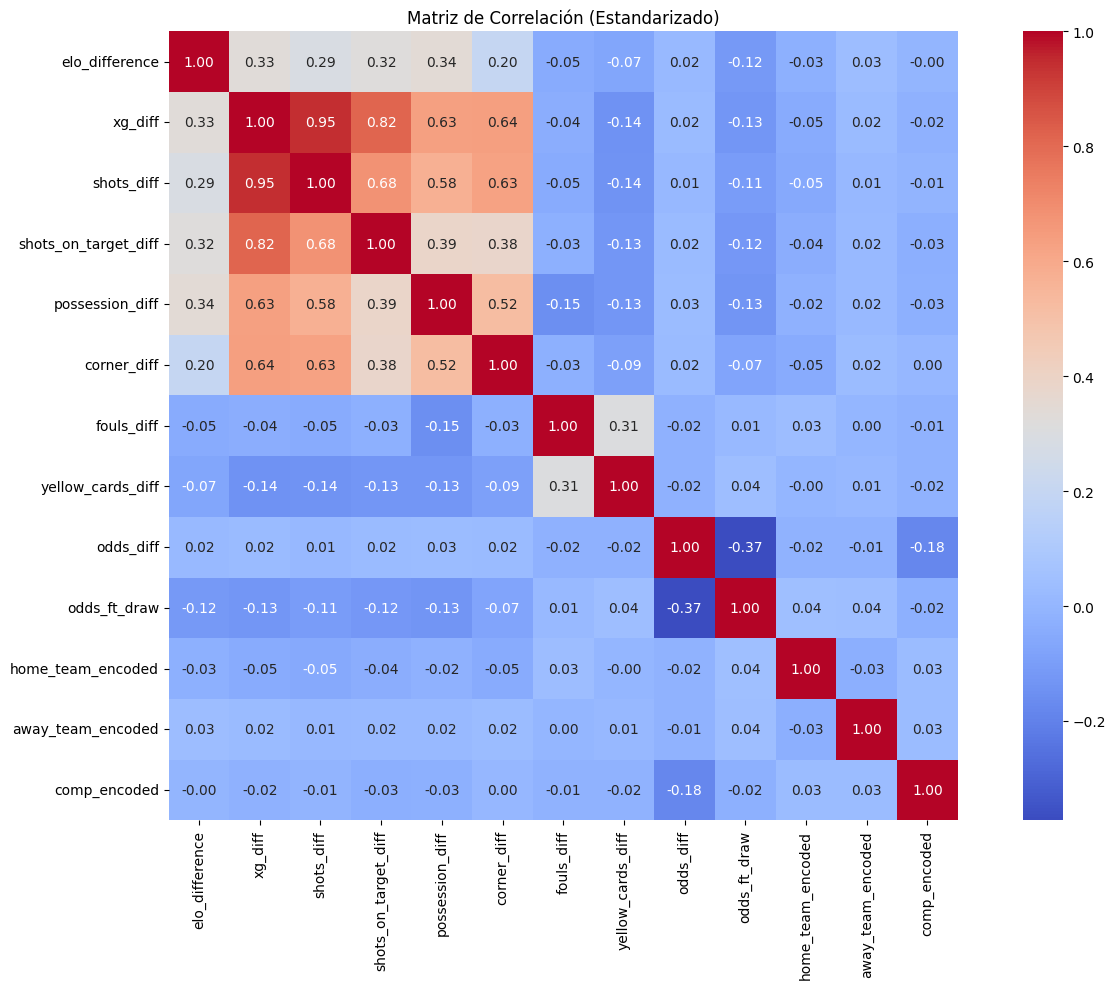

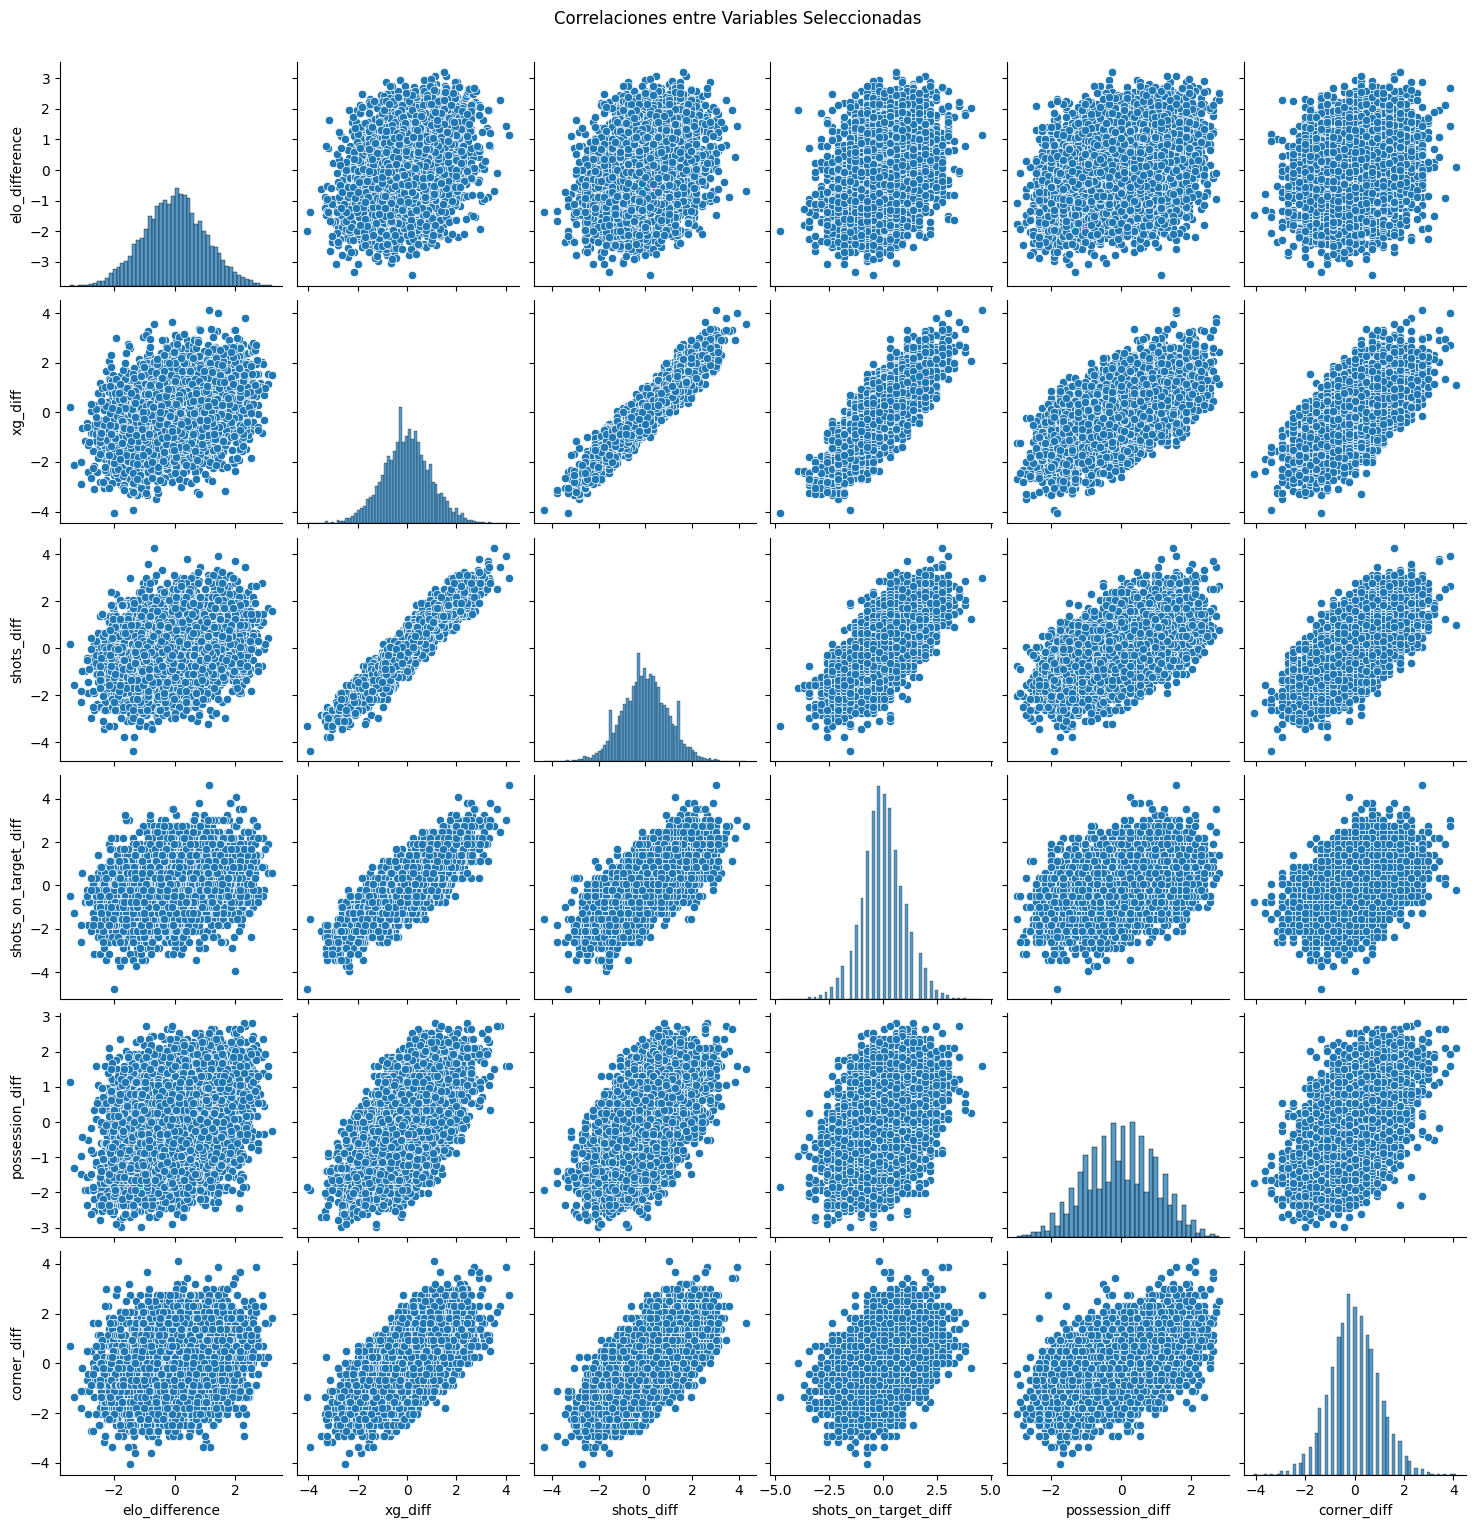

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar dataset
df = pd.read_excel("/content/dataset final provisional.xlsx")

# Selección de variables numéricas para análisis
features = [
    "elo_difference", "xg_diff", "shots_diff", "shots_on_target_diff",
    "possession_diff", "corner_diff", "fouls_diff", "yellow_cards_diff",
    "odds_diff", "odds_ft_draw",
    "home_team_encoded", "away_team_encoded", "comp_encoded"
]

# Subset numérico
df_numeric = df[features]

# Estandarizar
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=features)

# Gráficas de distribución y boxplot (sin estandarizar)
plt.figure(figsize=(16, 10))
for i, col in enumerate(features):
    plt.subplot(7, 4, 2 * i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')

    plt.subplot(7, 4, 2 * i + 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

# Gráficas de distribución y boxplot (estandarizado)
plt.figure(figsize=(16, 10))
for i, col in enumerate(features):
    plt.subplot(7, 4, 2 * i + 1)
    sns.histplot(df_scaled[col], kde=True)
    plt.title(f'Distribución Est. de {col}')

    plt.subplot(7, 4, 2 * i + 2)
    sns.boxplot(x=df_scaled[col])
    plt.title(f'Boxplot Est. de {col}')
plt.tight_layout()
plt.show()

# Matriz de correlación estandarizada
plt.figure(figsize=(14, 10))
sns.heatmap(df_scaled.corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Matriz de Correlación (Estandarizado)")
plt.tight_layout()
plt.show()

# Gráficos de correlación cruzada (scatterplot matrix)
sns.pairplot(df_scaled[features[:6]])
plt.suptitle("Correlaciones entre Variables Seleccionadas", y=1.02)
plt.show()
